In [1]:
#Importing EDA required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing libraries required for Association rule mining
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting up figure parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
#importing Dataset
data = pd.read_csv("book.csv")

In [4]:
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


The dataset is already encoded so we can directly move forward with EDA process

# EDA

In [5]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

There are no null values found in the dataset and the dataset is already encoded.

We can now do basic visualization to understand the data

# Visualization

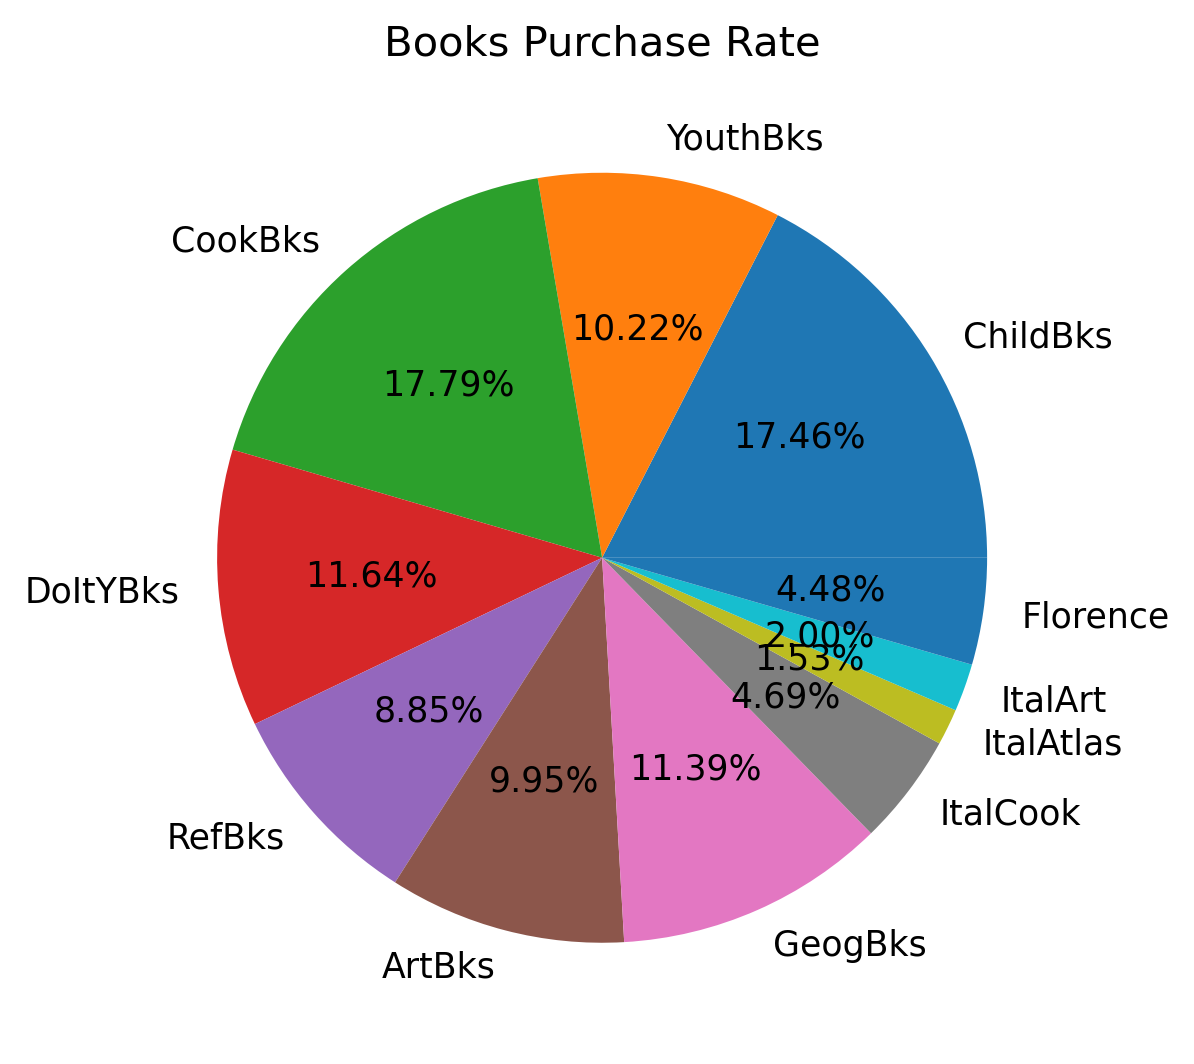

In [7]:
#Pie chart
plt.pie(data.sum(), labels=data.columns, autopct= '%.2f%%',)
#plt.legend()
plt.title("Books Purchase Rate")
plt.show()


In [8]:
#Bar Plo0t

In [9]:
count = data.sum()

In [10]:
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [11]:
count.sort_values(0, ascending=False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [12]:
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


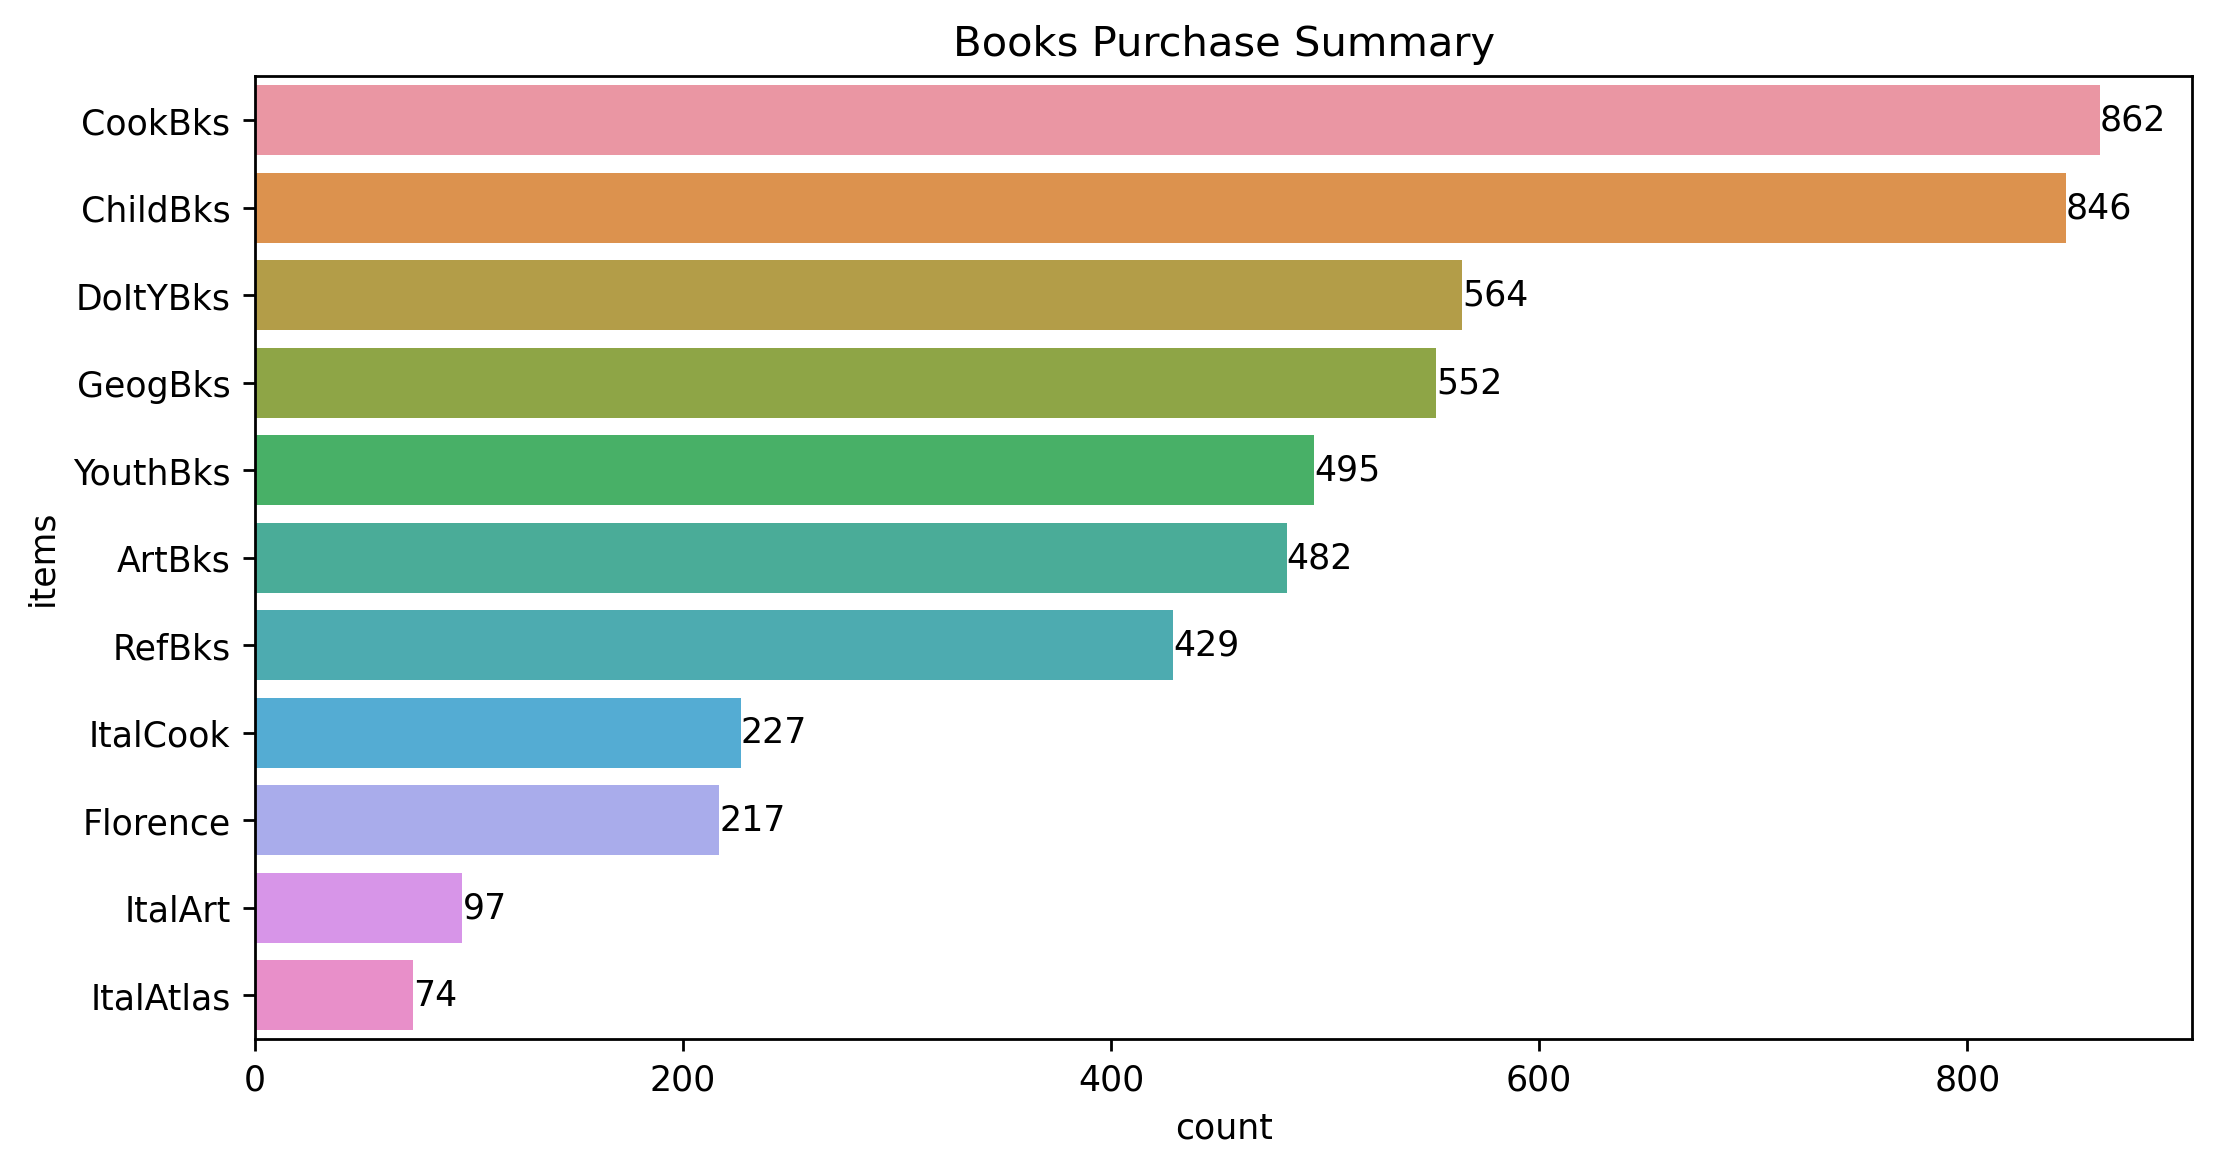

In [13]:
ax = sns.barplot(x = 'count', y = 'items', data=count)
plt.title('Books Purchase Summary')
for i in ax.containers:
    ax.bar_label(i)

# Model
kindly note:  Model visulization is done just after every Model

For support of 20% and confidence of 80%

In [14]:
score = apriori(data, min_support= 0.2, use_colnames=True)
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [15]:
model = association_rules(score, metric='confidence', min_threshold=0.8)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


We got no data points for above analysis, Therefore we take some other range

For support 10% and confidence of 80%

In [16]:
score = apriori(data, min_support=0.1, use_colnames=True)
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [17]:
model = association_rules(score, metric='confidence', min_threshold=0.8)
model.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
4,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
5,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
2,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594


Visualization

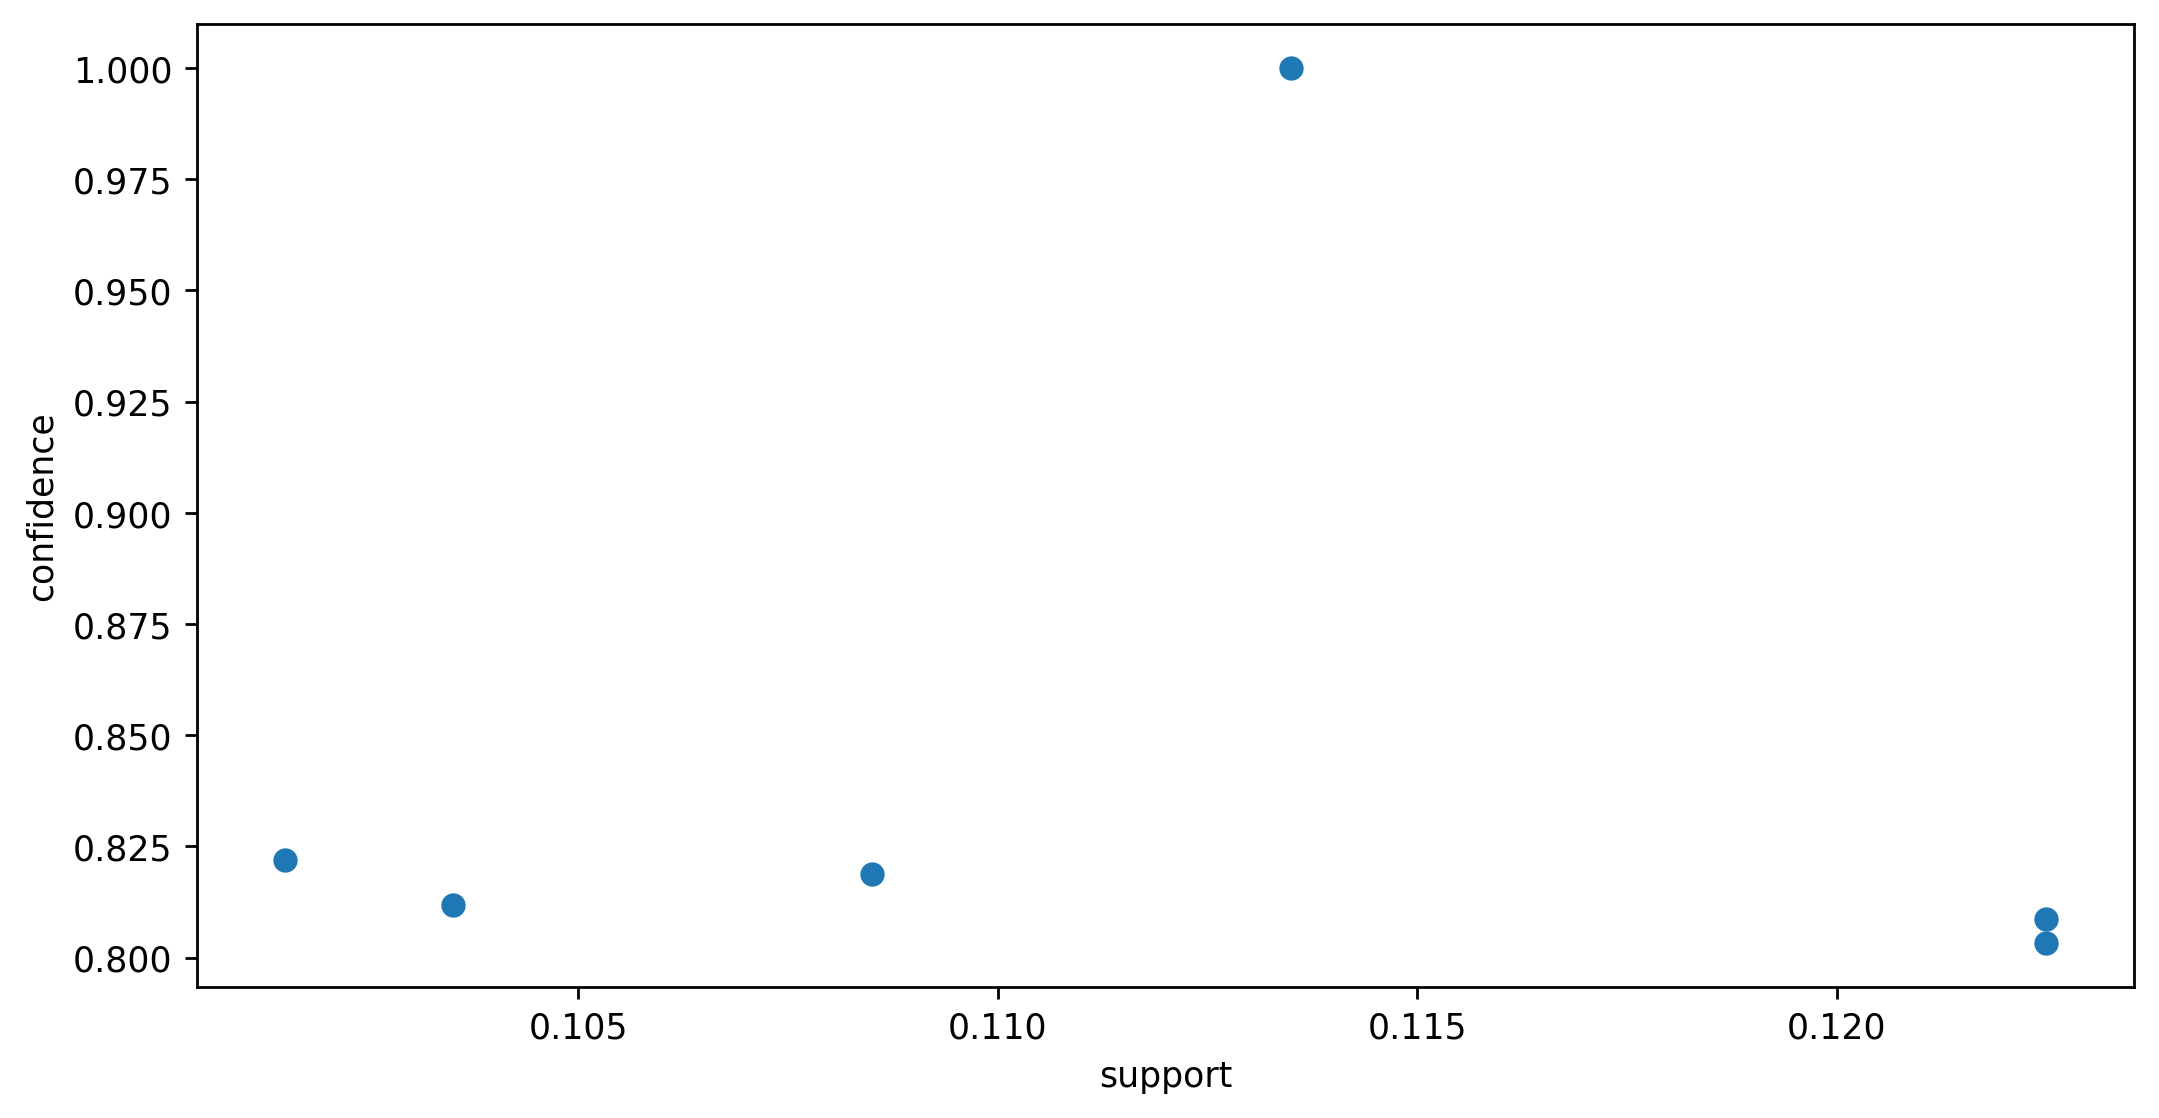

In [18]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [19]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents,(CookBks),(ChildBks)
antecedents,,
(ItalCook),2.320186,NaN
"(CookBks, RefBks)",NaN,1.899004
"(ChildBks, RefBks)",1.876058,NaN
"(DoItYBks, ArtBks)",1.906873,NaN
"(DoItYBks, GeogBks)",1.899926,NaN
"(ArtBks, GeogBks)",1.883445,NaN


<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

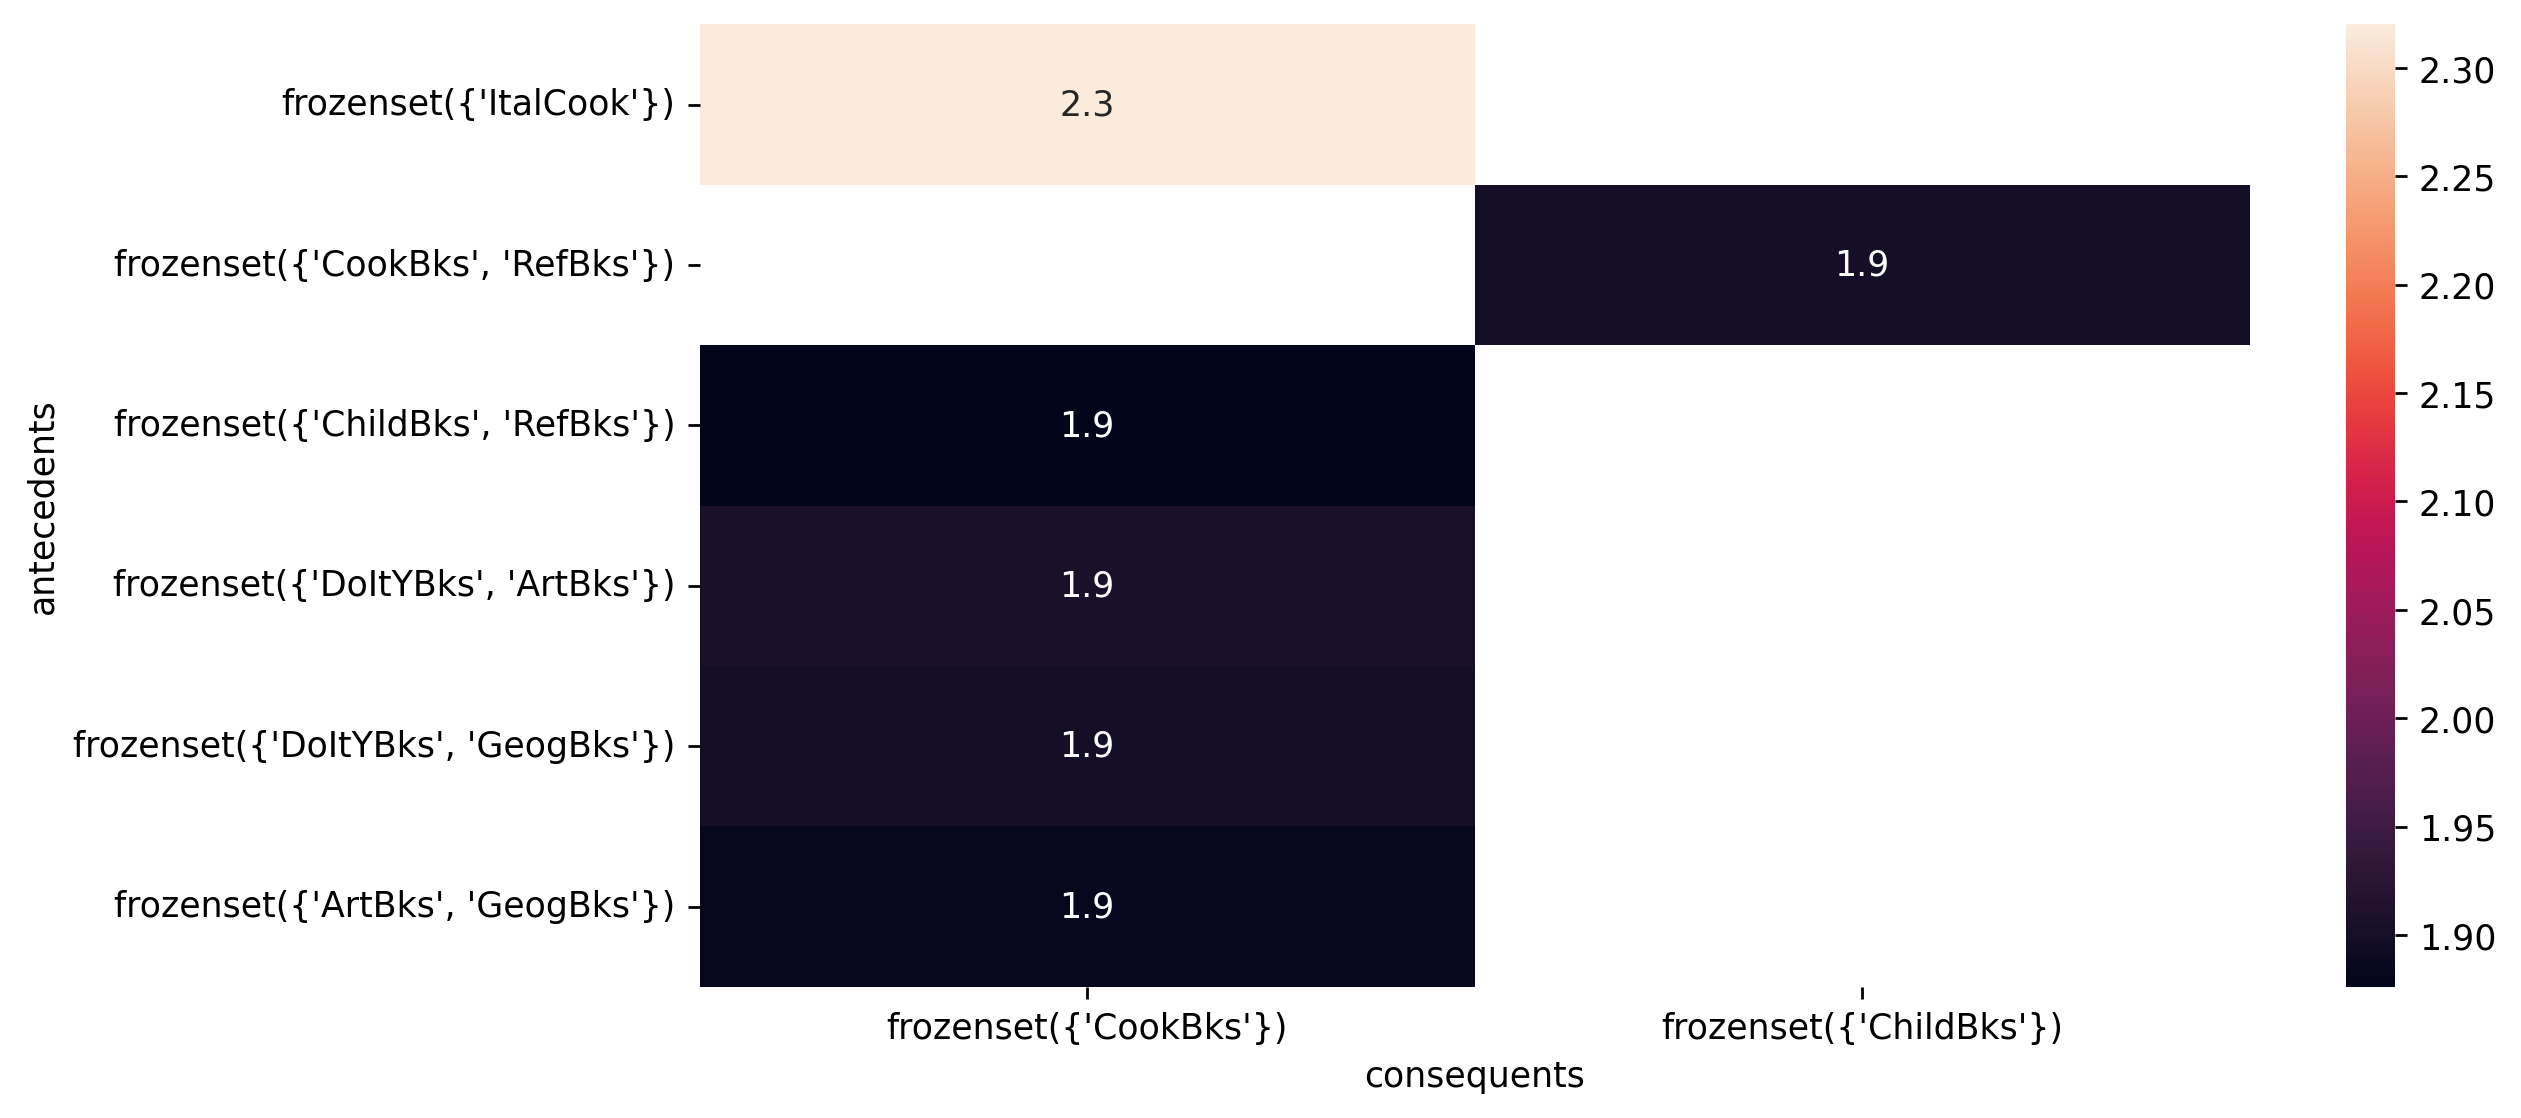

In [20]:
sns.heatmap(matrix, annot=True)

For support 10% and confidence 70%

In [21]:
#We can use same score as we used above
model = association_rules(score, metric='confidence', min_threshold=0.7)
model.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
16,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
17,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
18,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
9,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
8,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
15,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
4,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479


Visualization

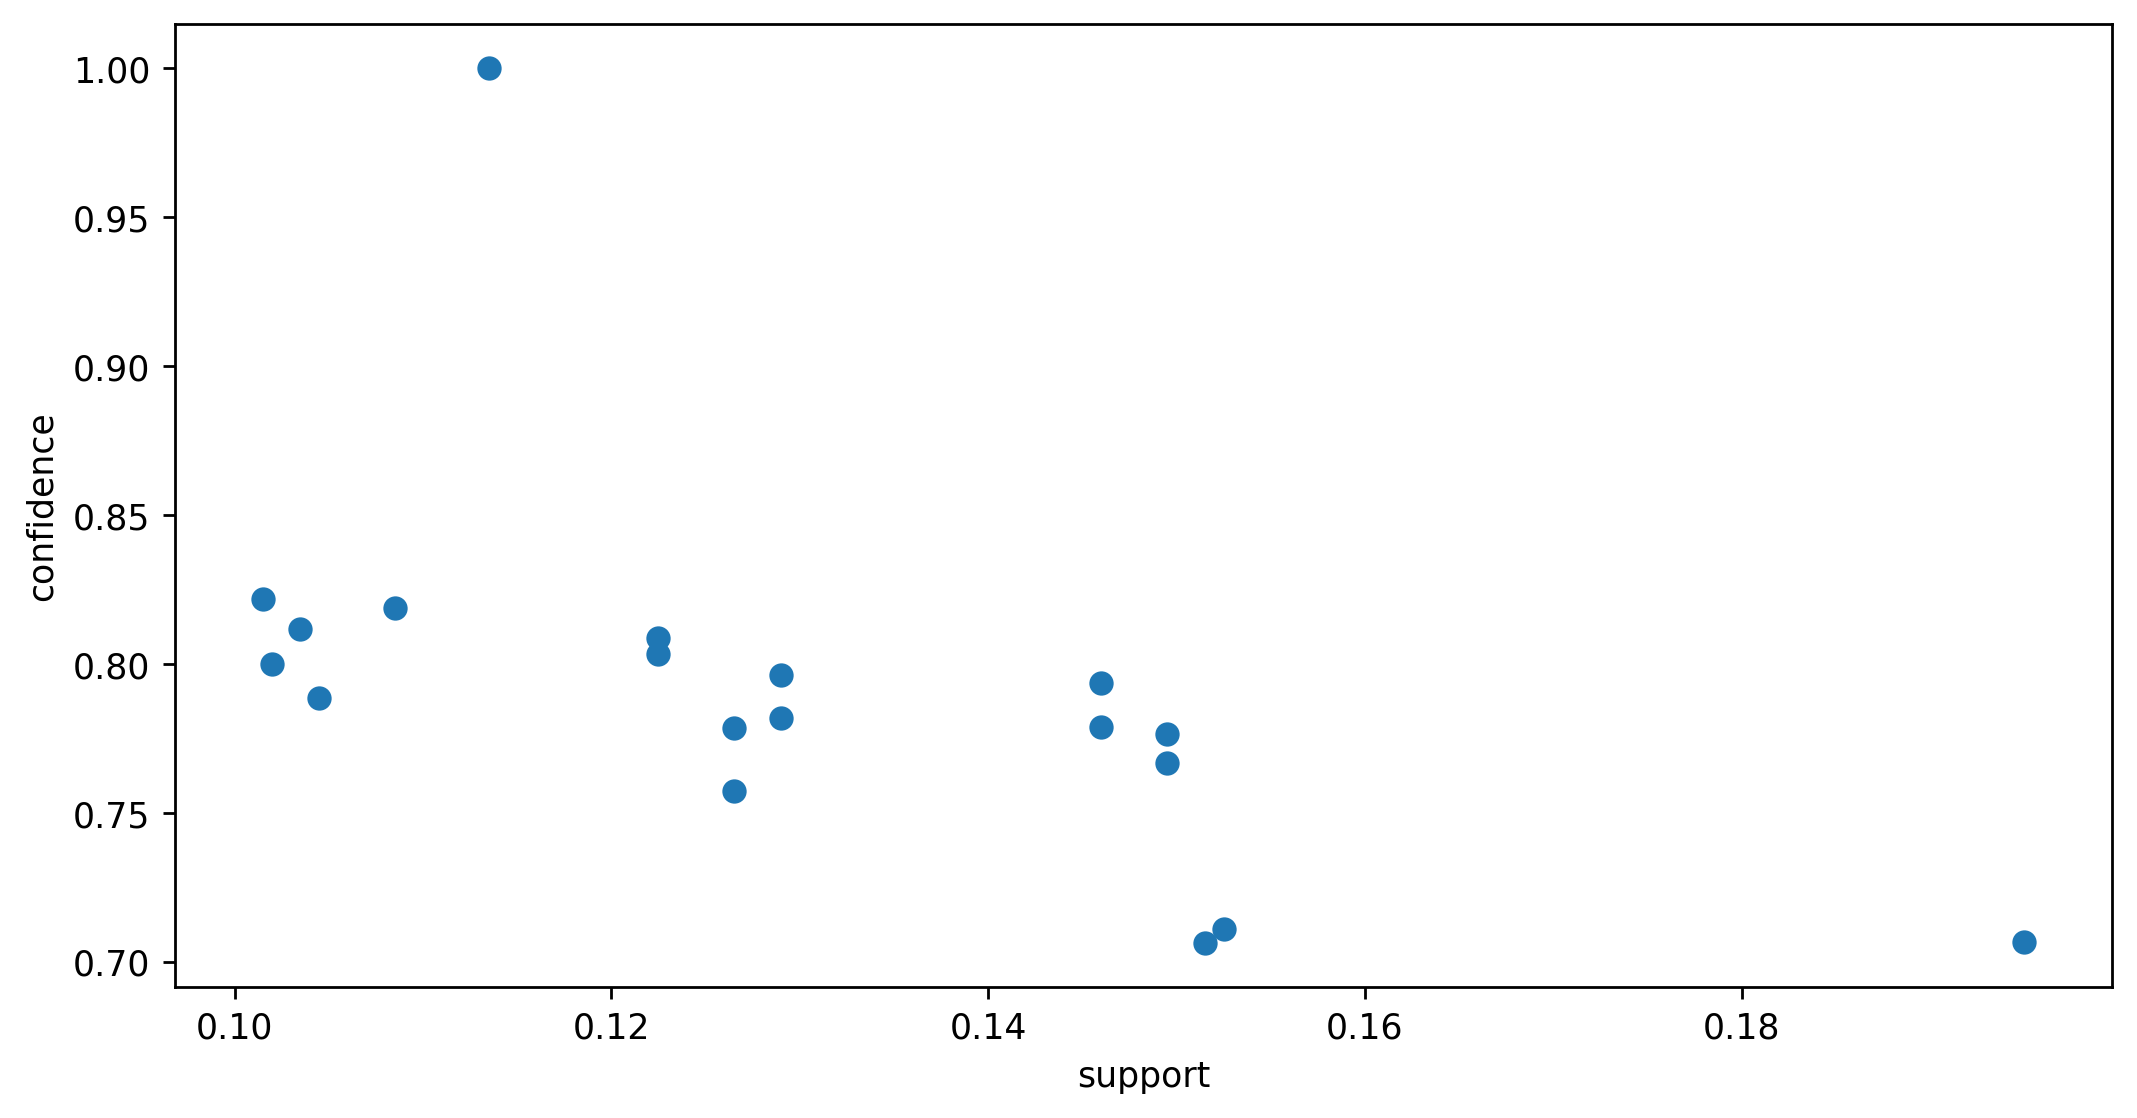

In [22]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [23]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(CookBks)
antecedents,,
(RefBks),1.669725,1.649549
(GeogBks),1.670264,NaN
(ItalCook),NaN,2.320186
"(YouthBks, CookBks)",1.882497,NaN
"(YouthBks, ChildBks)",NaN,1.813963
"(DoItYBks, CookBks)",1.840820,NaN
"(DoItYBks, ChildBks)",NaN,1.841017
"(CookBks, RefBks)",1.899004,NaN
"(ChildBks, RefBks)",NaN,1.876058


<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

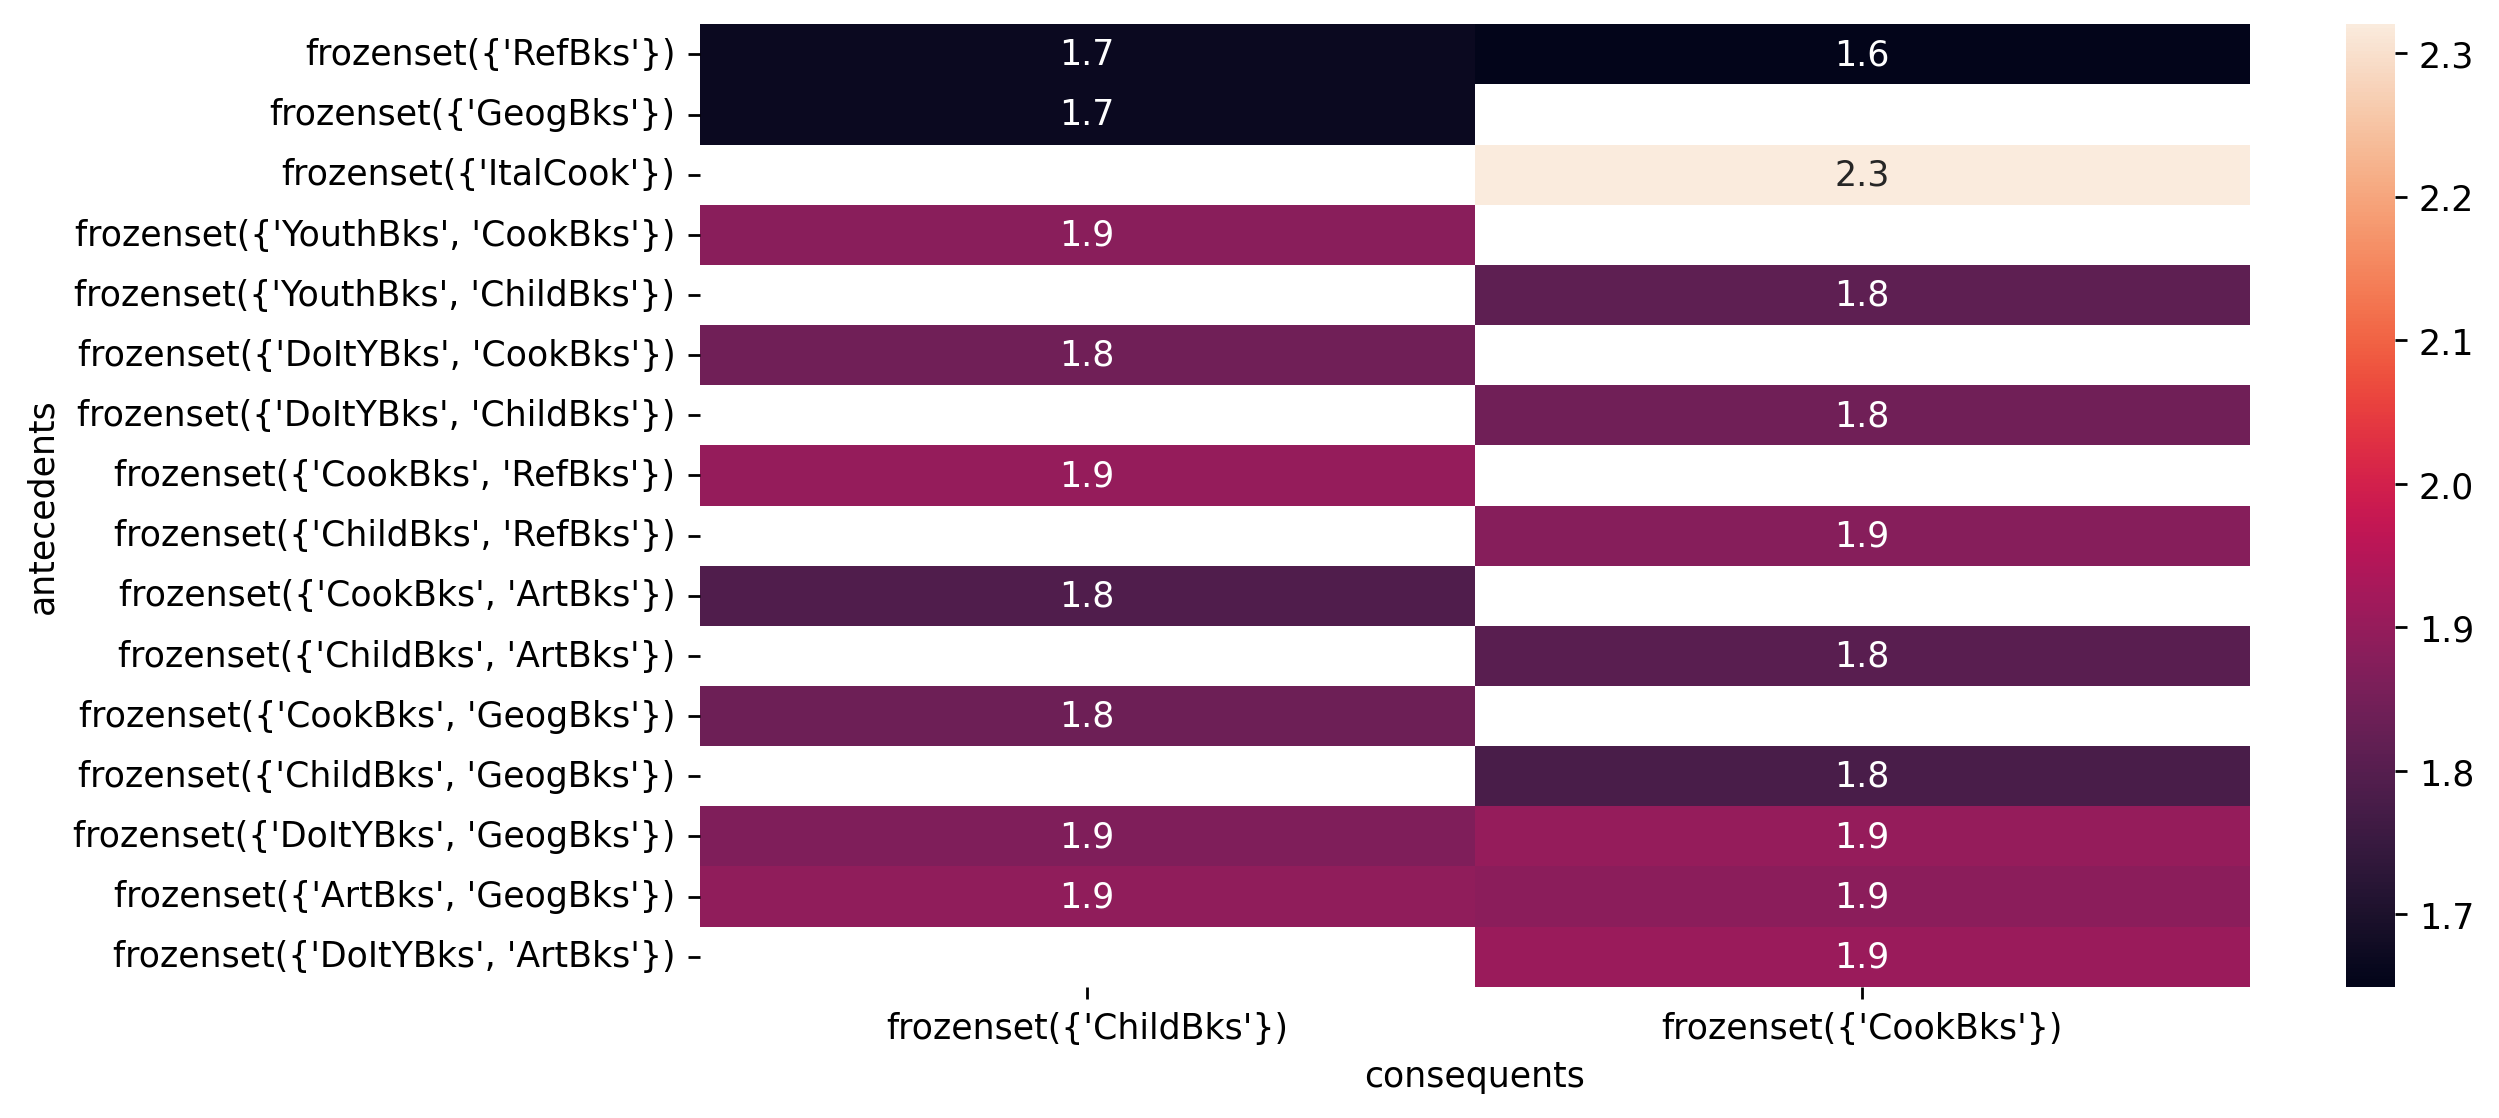

In [24]:
sns.heatmap(matrix, annot=True)

We now try building association model using lift ratio.

For min support of 20% and lift ratio of 70%

In [25]:
score = apriori(data, min_support= 0.2, use_colnames=True)

In [26]:
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [27]:
model = association_rules(score, metric= 'lift', min_threshold=0.7)

In [28]:
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


Visualization

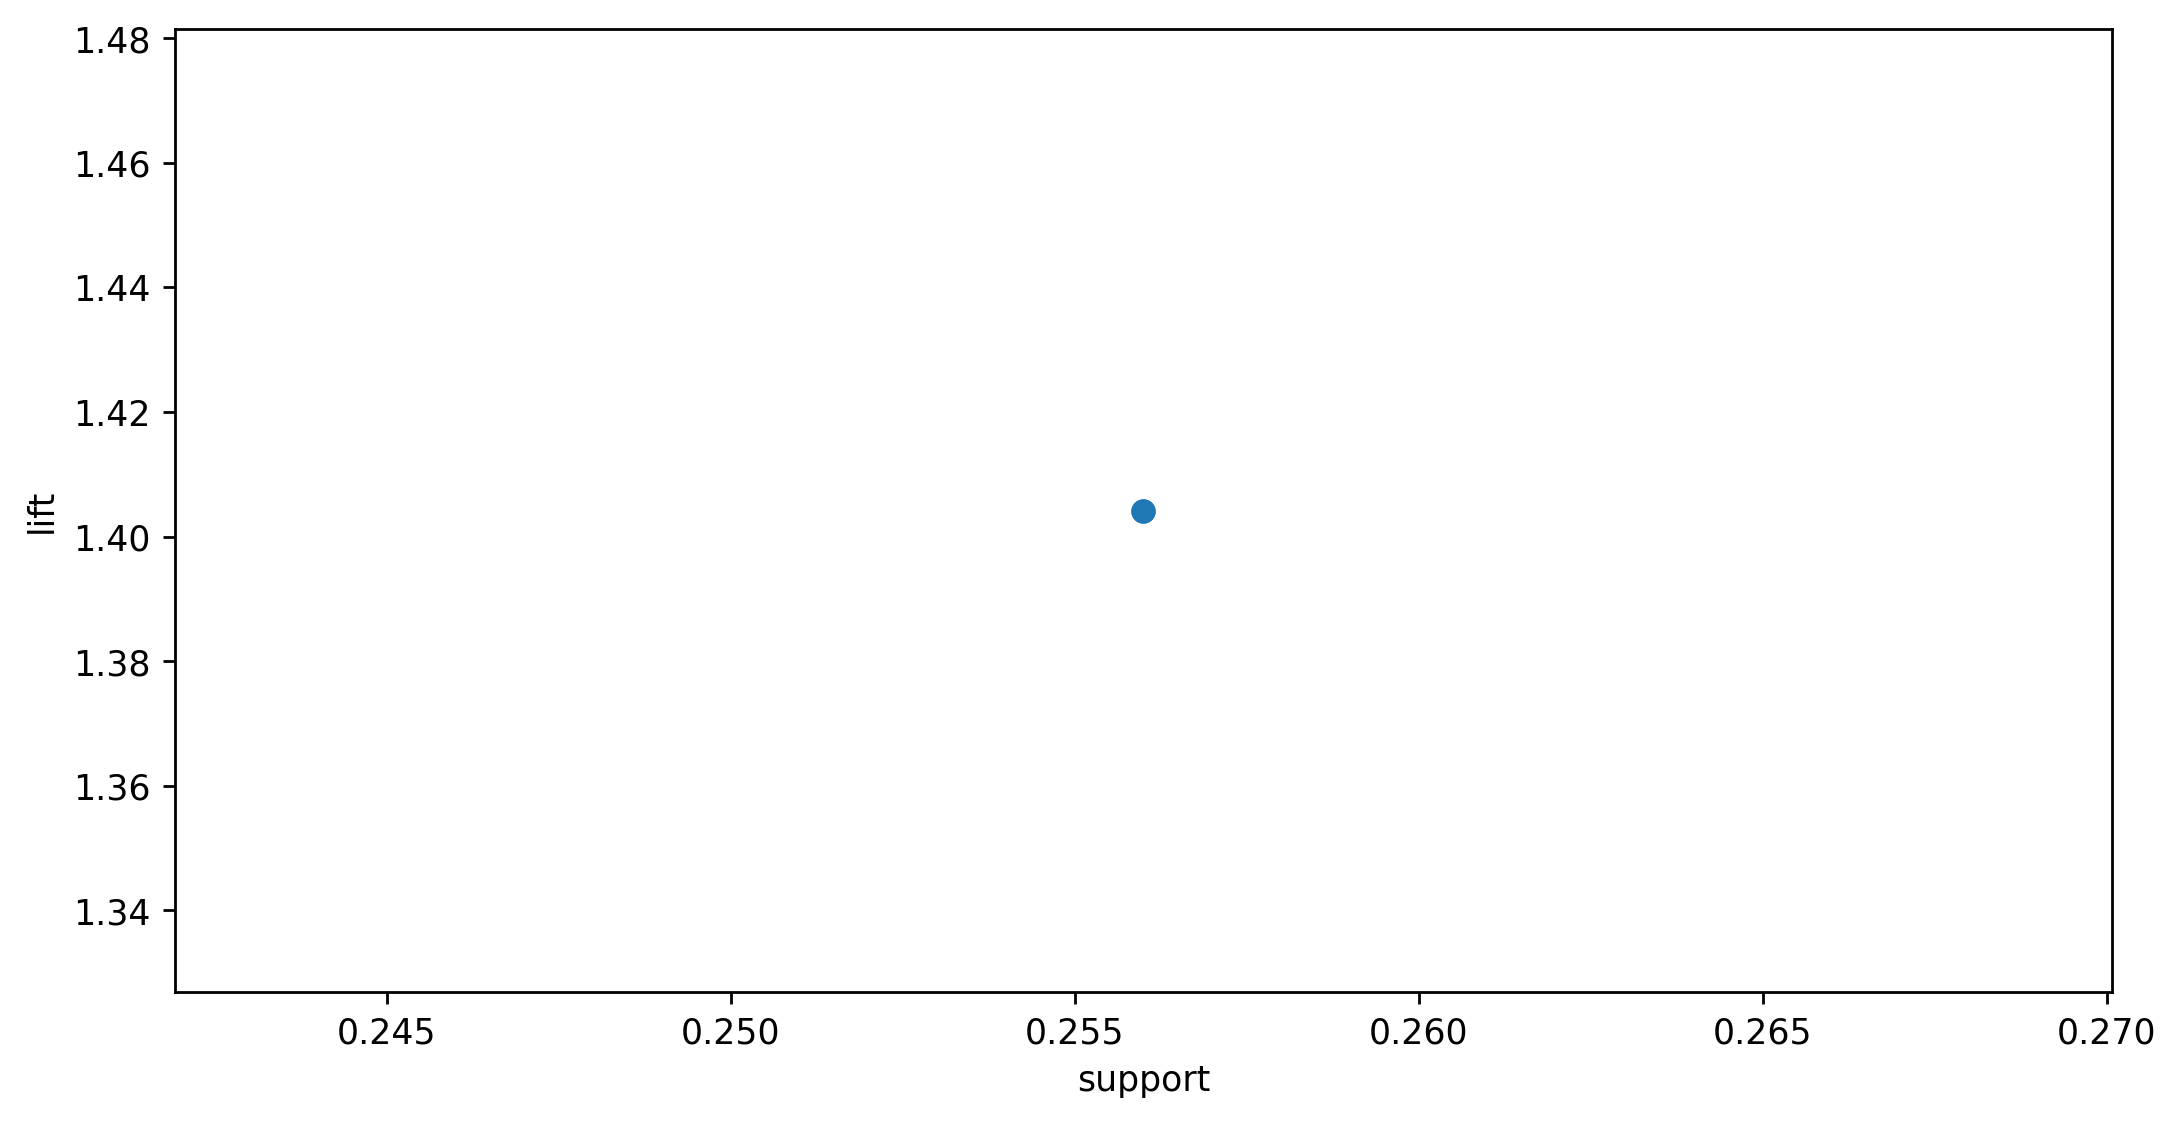

In [29]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [30]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(CookBks)
antecedents,,
(CookBks),1.404179,NaN
(ChildBks),NaN,1.404179


<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

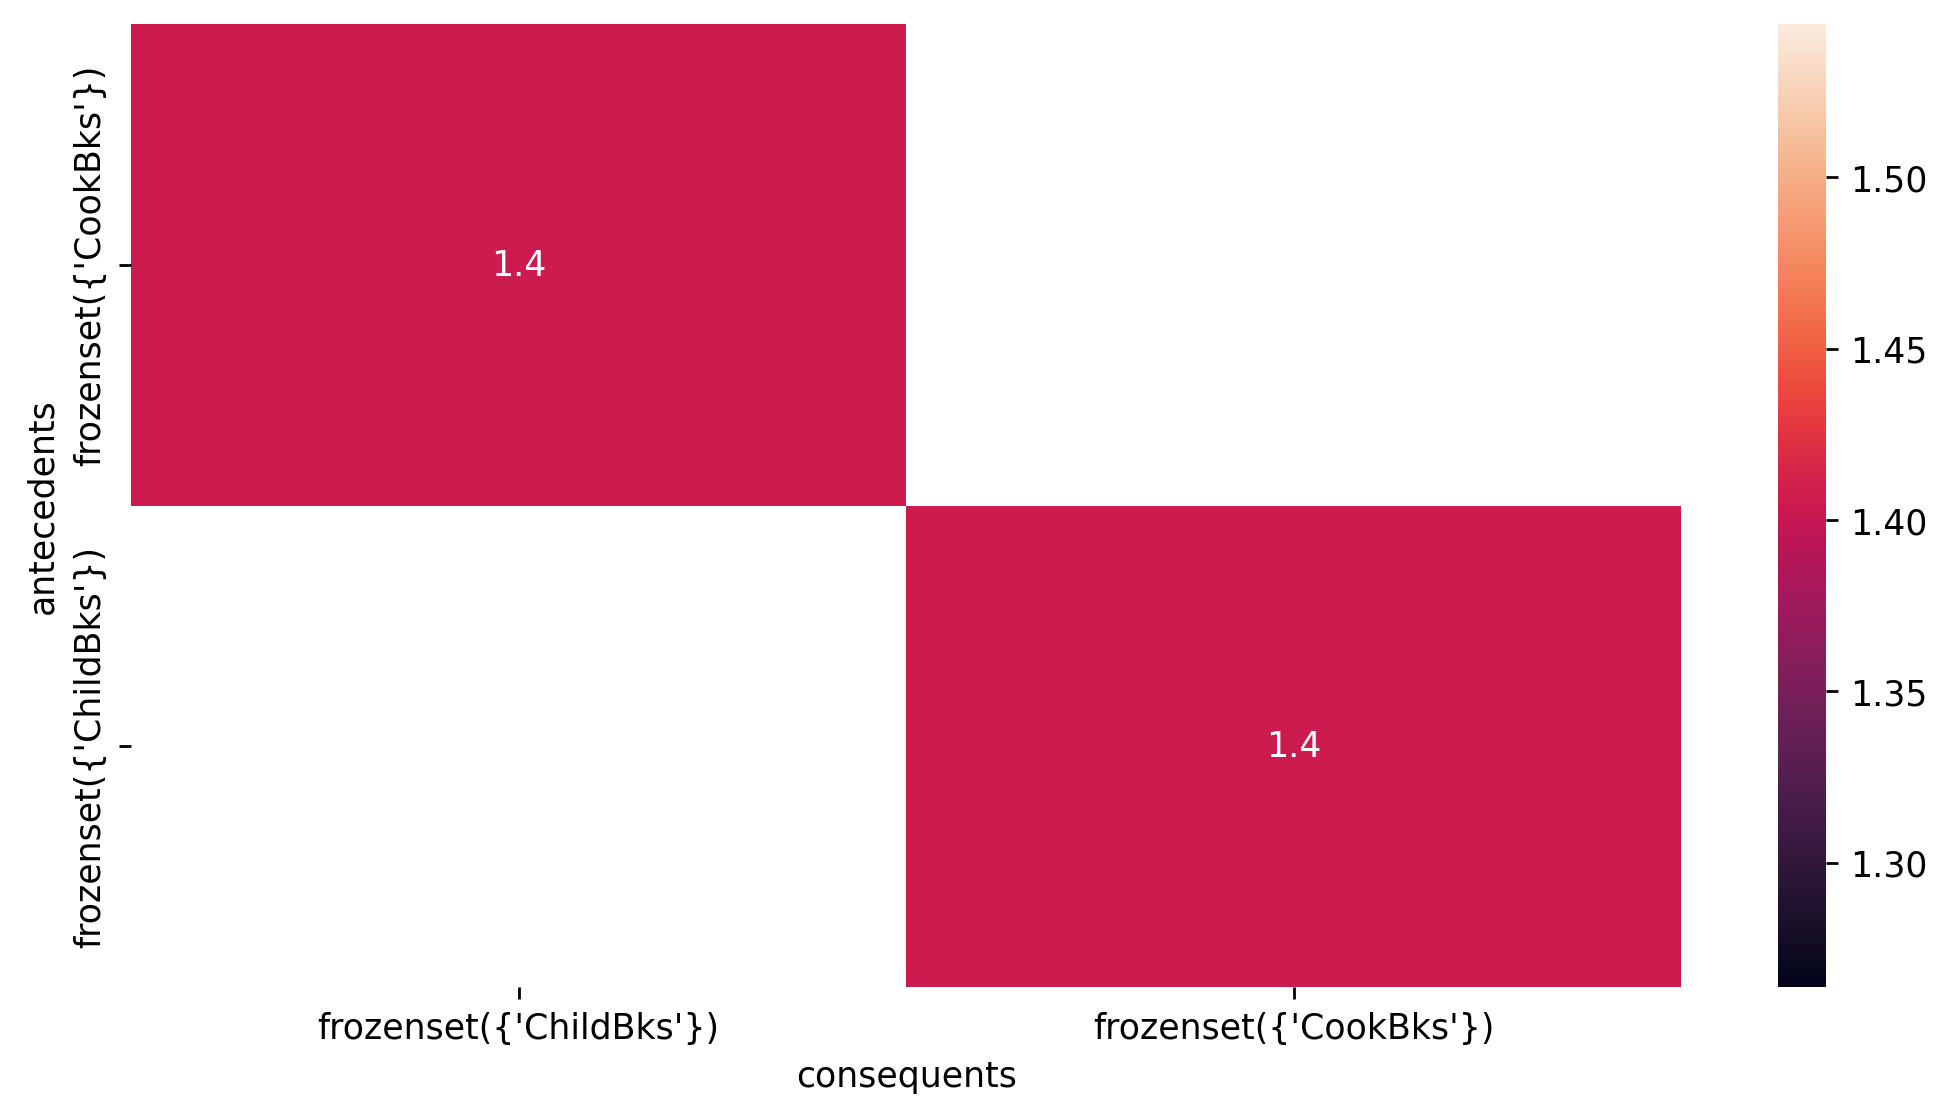

In [31]:
sns.heatmap(matrix, annot=True )

For support of 10% and lift ratio of 80%

In [32]:
score = apriori(data, min_support=0.1, use_colnames=True)
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [33]:
model = association_rules(score,  metric='lift', min_threshold=0.8)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [34]:
model.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


Visualization

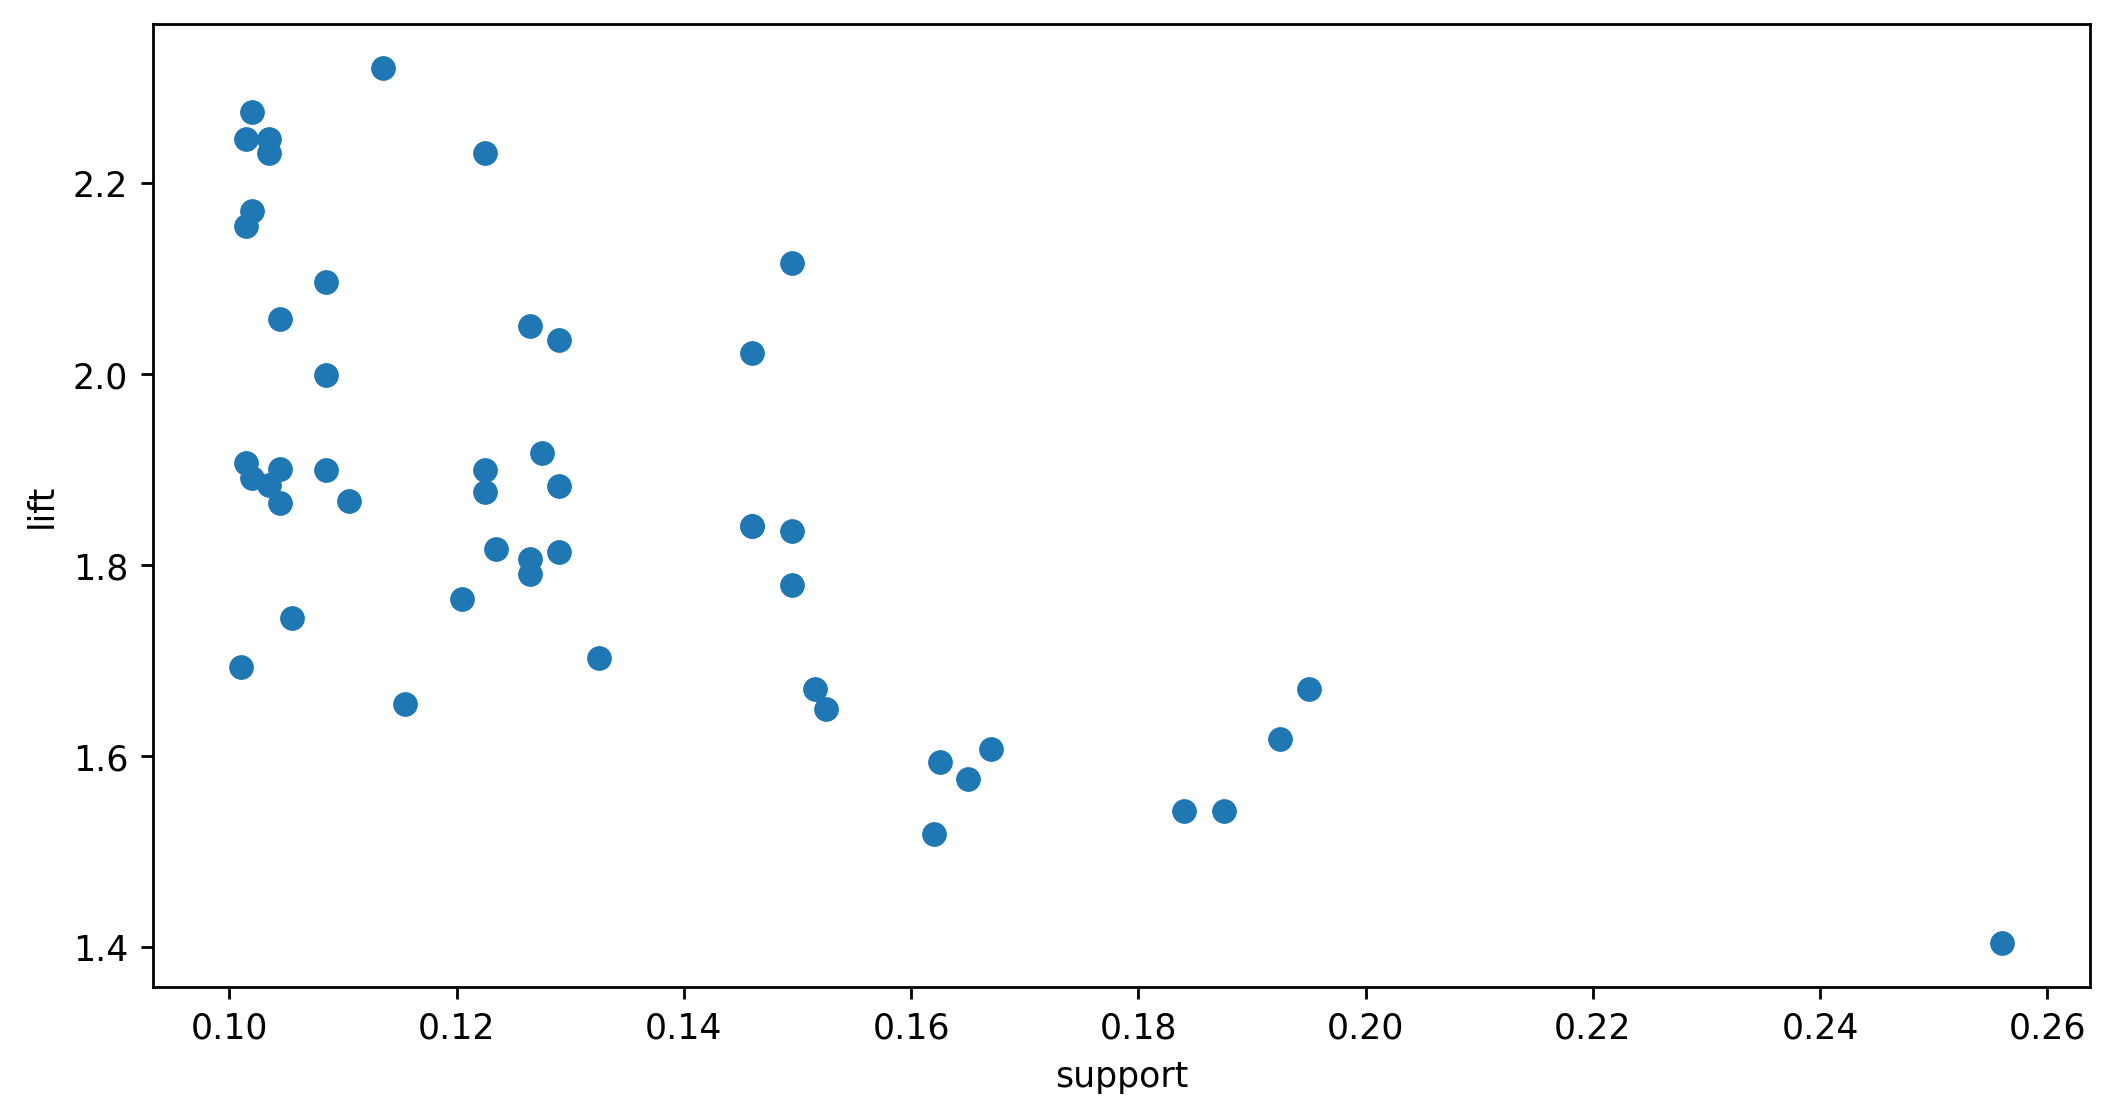

In [35]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [36]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(YouthBks),(CookBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(ChildBks, GeogBks)","(CookBks, ArtBks)","(ChildBks, ArtBks)","(CookBks, RefBks)","(ChildBks, RefBks)",...,"(ArtBks, GeogBks)","(YouthBks, ChildBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, ChildBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
(CookBks),1.404179,1.518667,NaN,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,...,1.883445,1.813963,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,1.841017,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN
"(ChildBks, ArtBks)",NaN,NaN,1.806175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN
"(CookBks, ArtBks)",1.790745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.245509,NaN,NaN,2.155264,NaN,NaN
"(ChildBks, RefBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

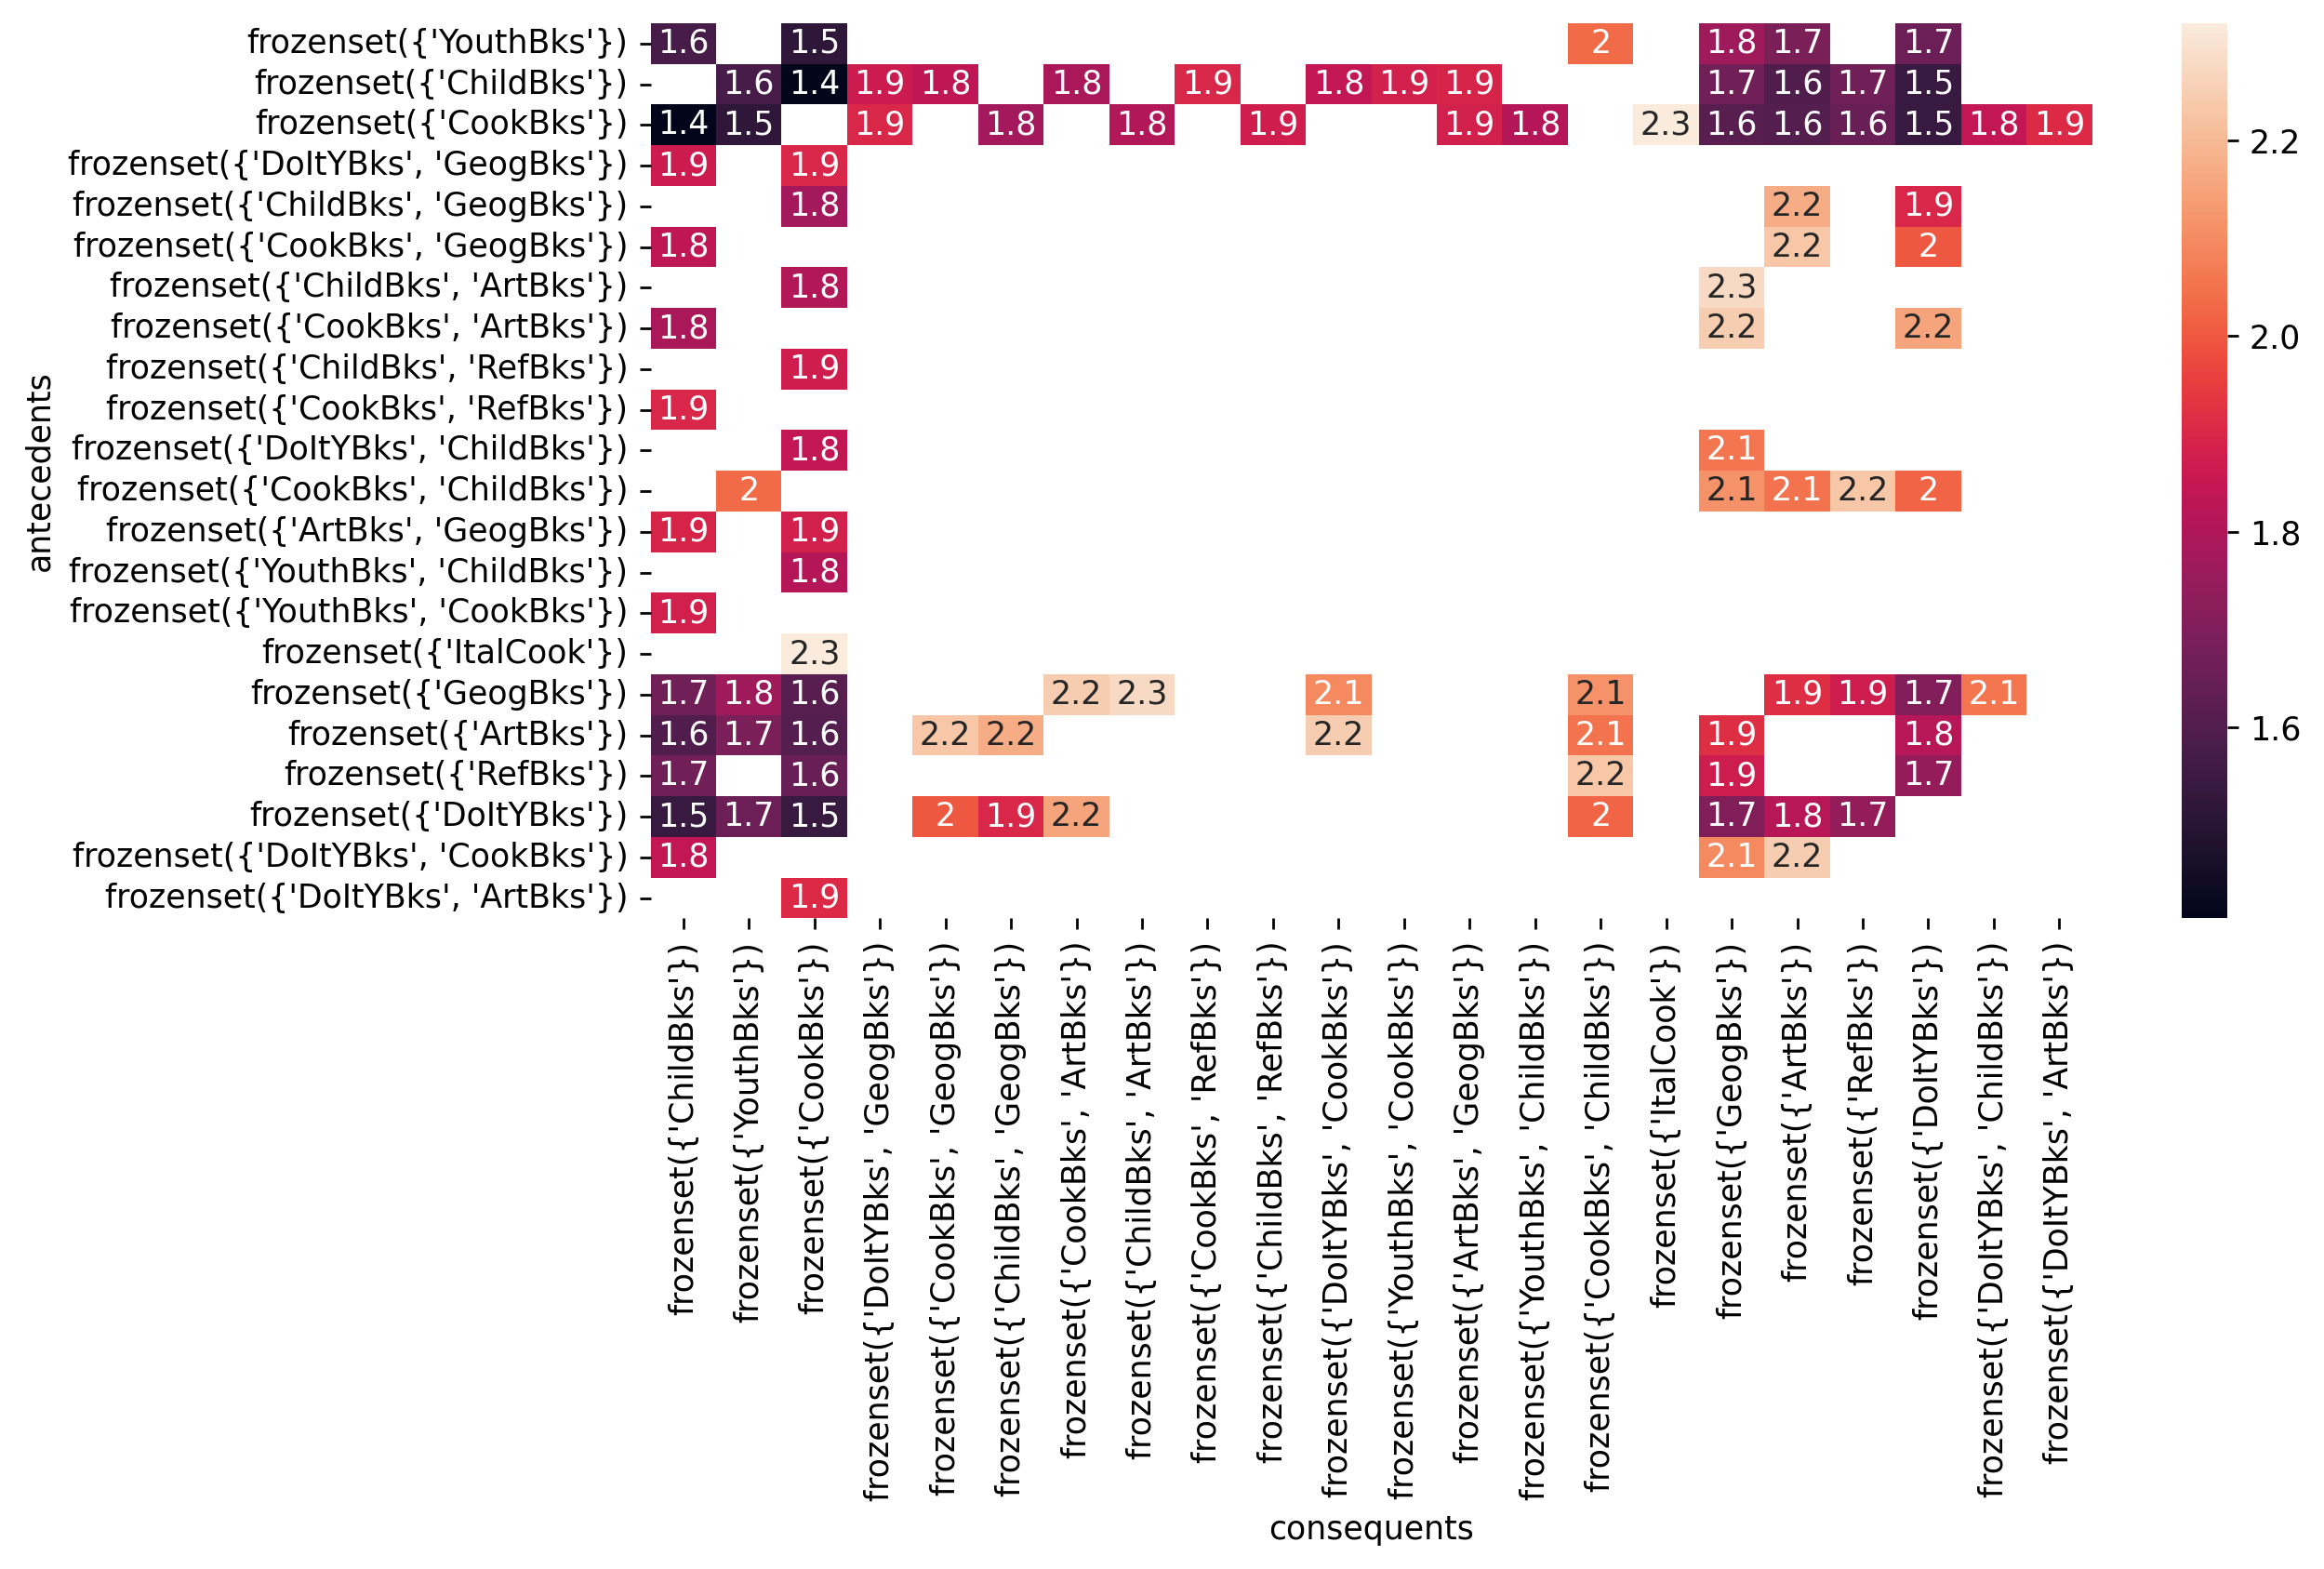

In [37]:
sns.heatmap(matrix, annot=True)

For support 10% and lift ratio 90%

In [38]:
#We can use the same score we used above as both have min_support of 10%
model = association_rules(score, metric='lift', min_threshold=0.9)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


We got most associations byfar using the above parameters
Support of 10% and lift ratio of 90%

Visualization

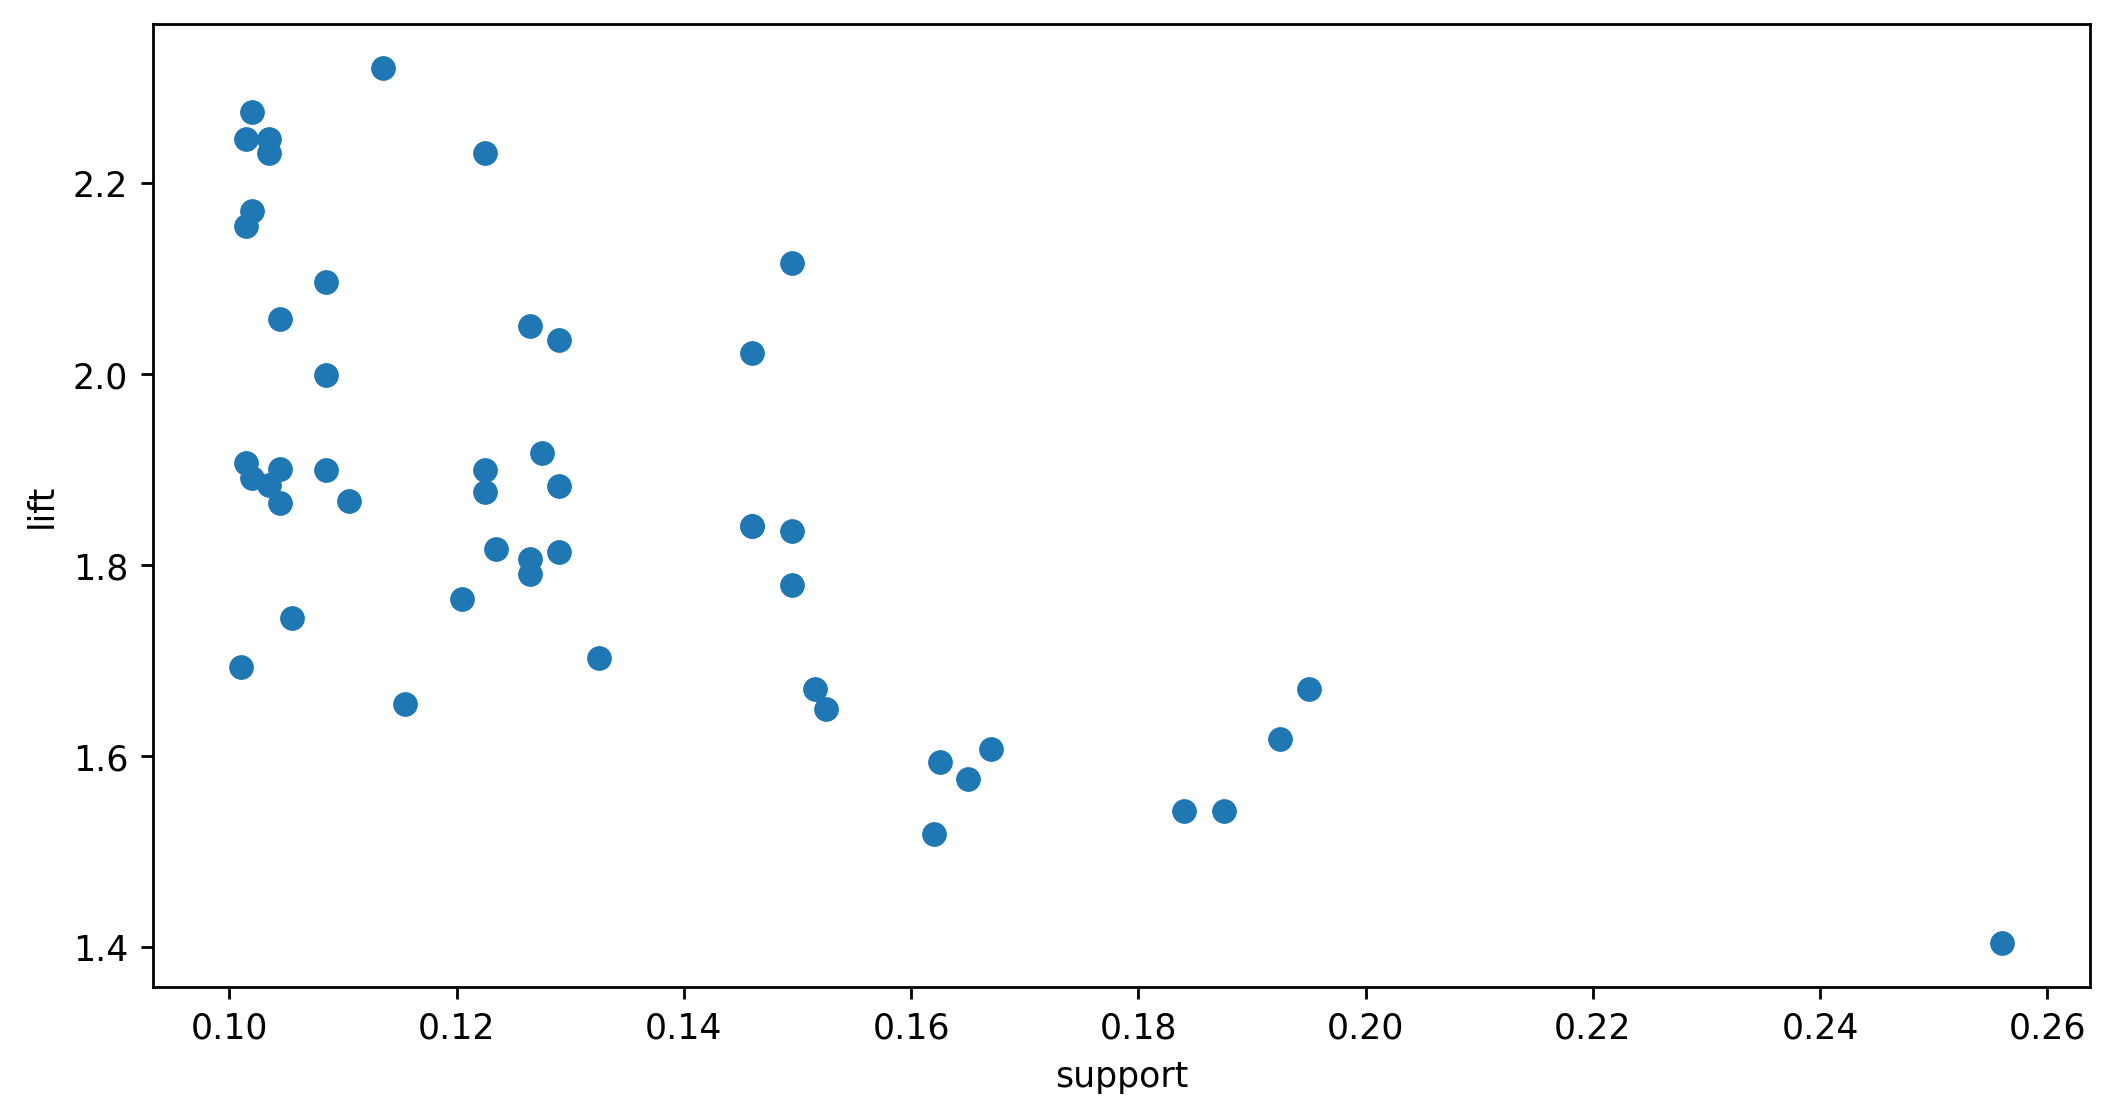

In [39]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [40]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(YouthBks),(CookBks),"(DoItYBks, GeogBks)","(CookBks, GeogBks)","(ChildBks, GeogBks)","(CookBks, ArtBks)","(ChildBks, ArtBks)","(CookBks, RefBks)","(ChildBks, RefBks)",...,"(ArtBks, GeogBks)","(YouthBks, ChildBks)","(CookBks, ChildBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),"(DoItYBks, ChildBks)","(DoItYBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.864490,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.891253,NaN,NaN,NaN,1.670264,1.594028,1.669725,1.542511,NaN,NaN
(CookBks),1.404179,1.518667,NaN,1.899926,NaN,1.778809,NaN,1.806175,NaN,1.876058,...,1.883445,1.813963,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,1.841017,1.906873
"(DoItYBks, GeogBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.170444,NaN,1.900346,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN
"(ChildBks, ArtBks)",NaN,NaN,1.806175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN
"(CookBks, ArtBks)",1.790745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.245509,NaN,NaN,2.155264,NaN,NaN
"(ChildBks, RefBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

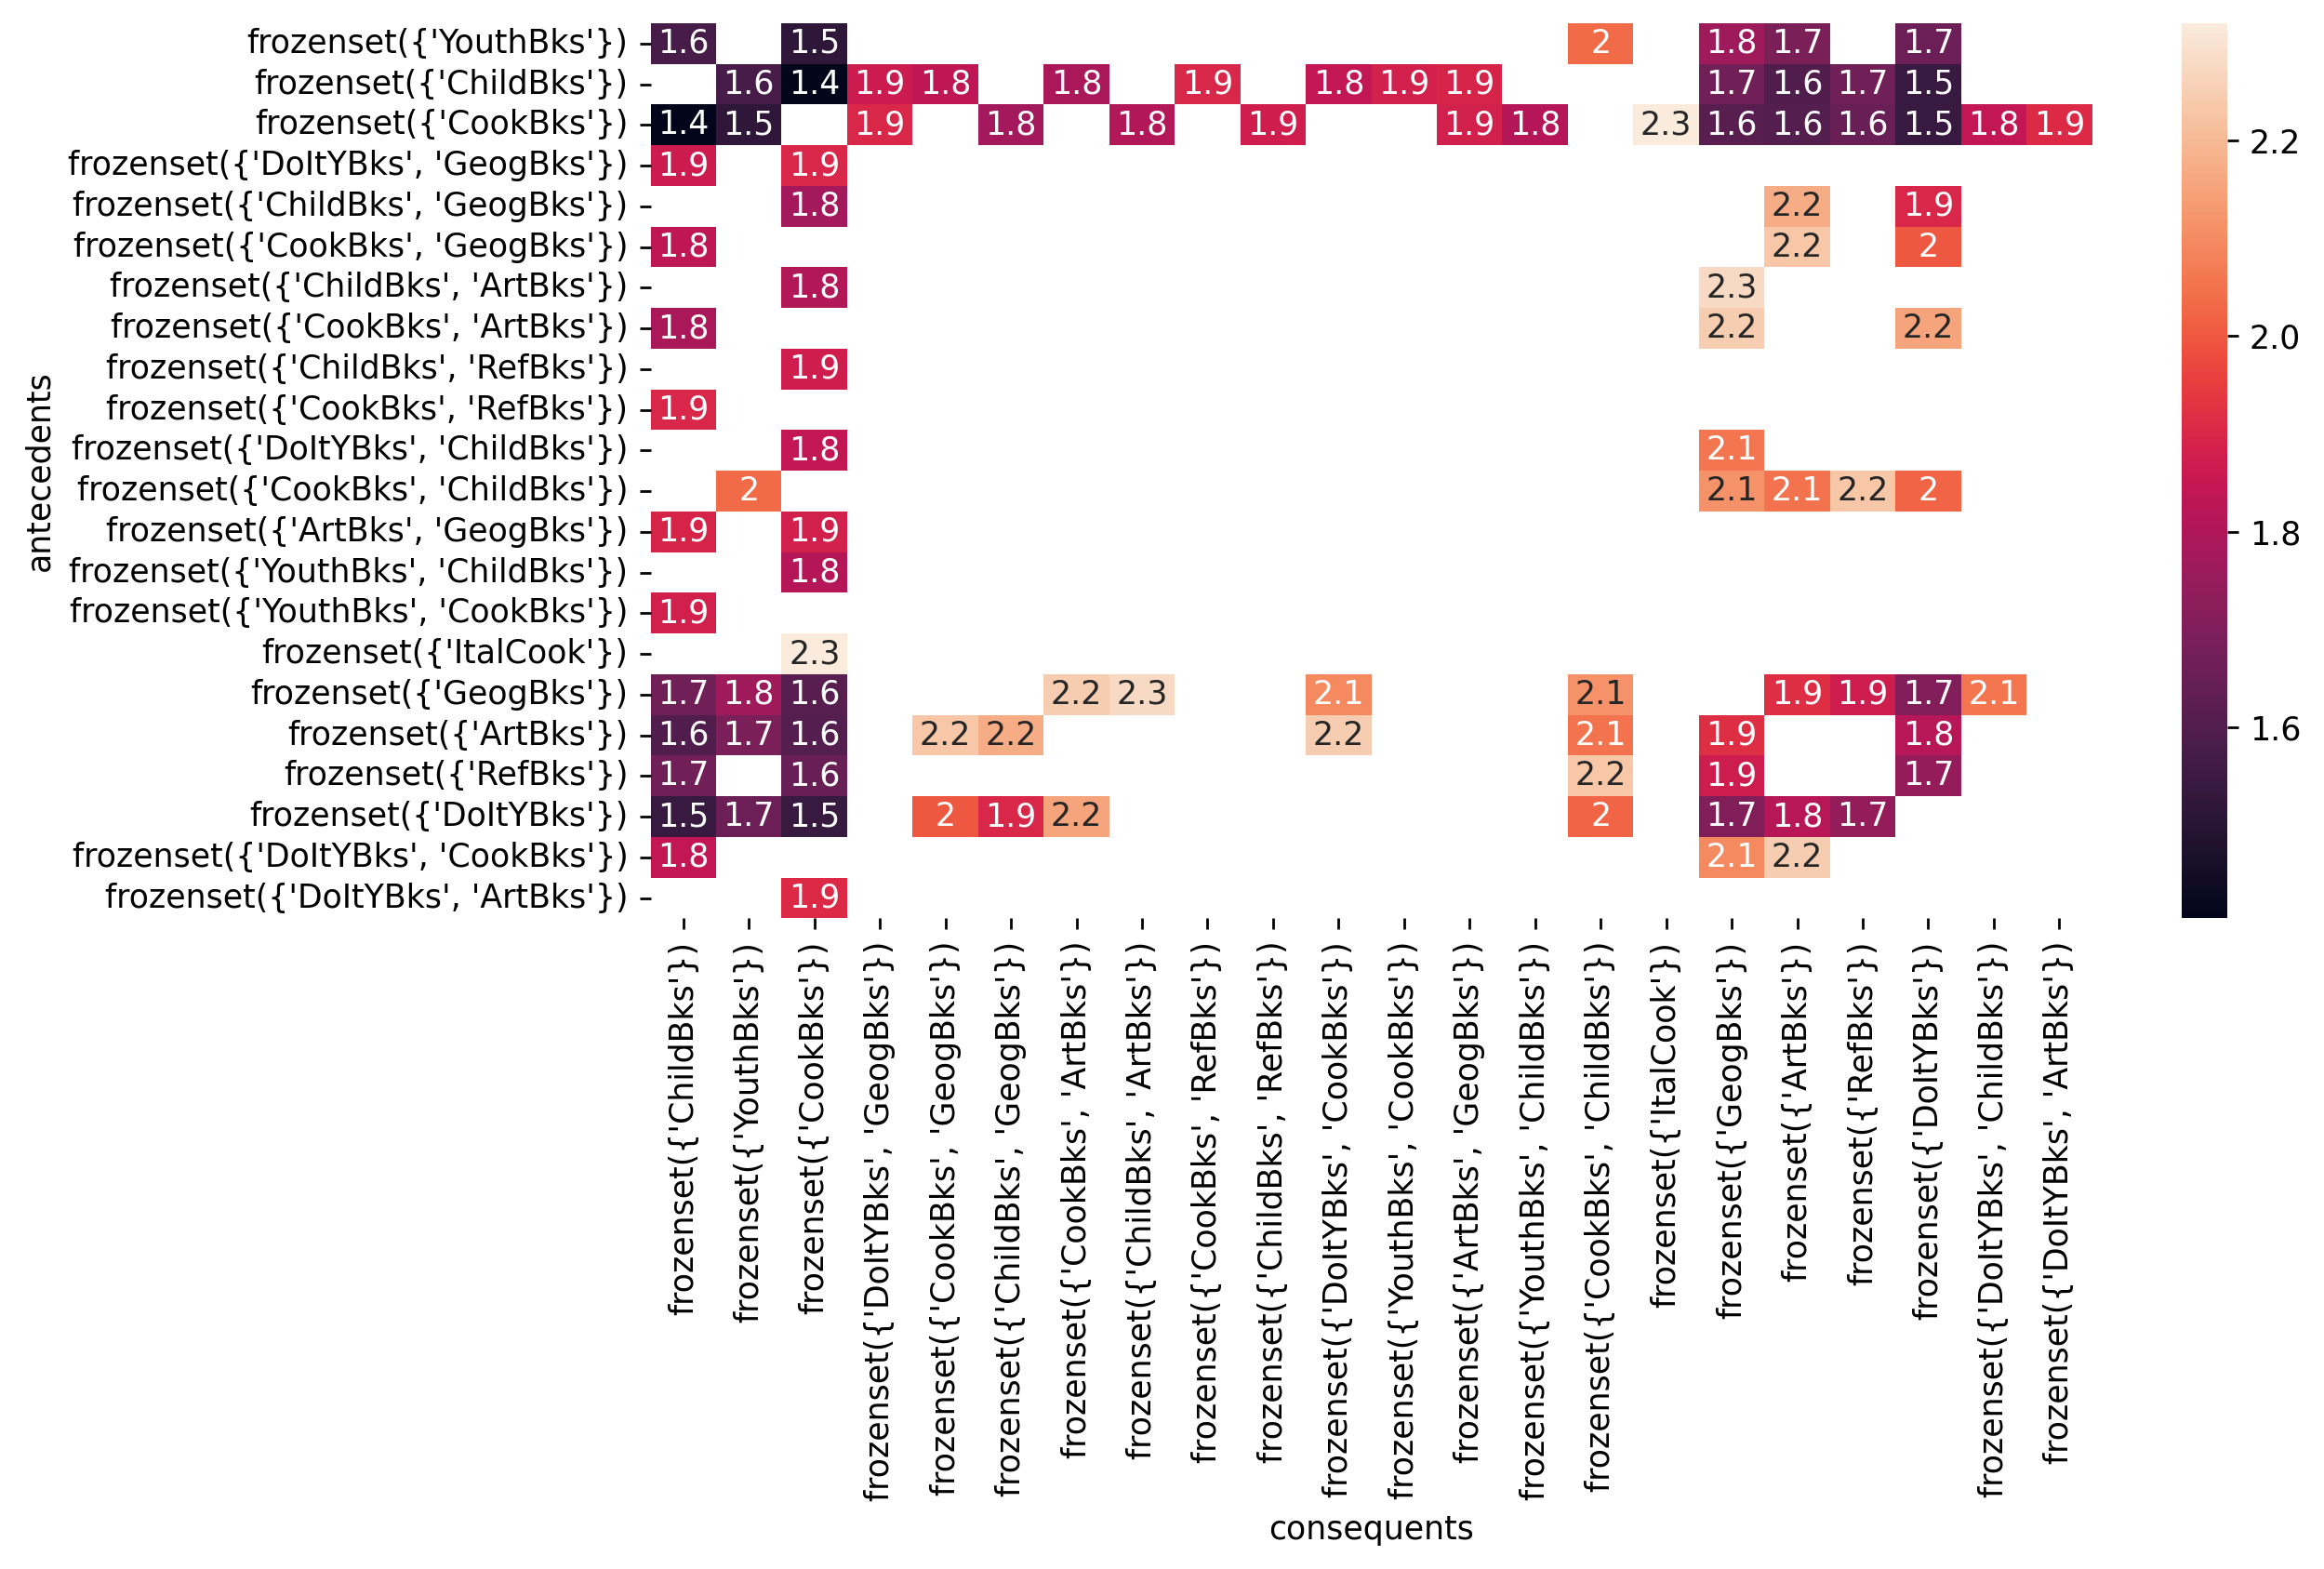

In [41]:
sns.heatmap(matrix, annot=True)